El objetivo de este proyecto es la diferenciacion de Setas Comestibles y Venenosas en todo el dataset, mediante el analisis de sus partes como el tallo, la cabeza, sus colores, fragancias, su habitat, etc.
La problematica encontrada seria desarrollar un modelo que pueda tener acceso a diversa cantidad de setas y su clasificacion, aprendiendo asi con nuevas setas a clasificarlas, disminuyendo el trabajo manual y dando oportunidad a un avance cientifico.

**<h3>Contexto Comercial<h3>**

Este proyecto sale de un documental que vi hace unos meses en donde mostraban la gran variedad de setas en el mundo y el estudio que conlleva, desperto mi interes el tener acceso a datos de setas con su clasificacion. Lo primero que vino a mi mente fue "Hay que automatizar la clasificacion de las setas" y generar un aporte a la ciencia. 

**<h3>Conexto analitico<h3>**

De un archivo .xlsx se extraeran datos de una muestra de setas, este consta de variables tipo categorica las cuales se las  debera modificar para poder trabajar con ellas. Tambien se determinaran diferentes conclusiones para analizar que variables son mas importantes para la creacion del modelo.

 **<h3>Preguntas de interes<h3>**

Se quiere distinguir visualmente las setas mediante un modelo de clasificacion, que discrimine entre Comestibles y Venenosas. Esto mediante el analisis de las caracteristicas visuales de cada seta en la muestra. Surgen muchas preguntas con un tema muy poco conocido, por lo que escogi las principales:
* Que color predomina en una seta venenosa?
* Tiene un tallo peculiar una seta comestible?
* Que fragancias confundirian la distincion?
* Si contiene moretones, esto aumenta o disminuye la posibilidad de que la seta sea venenosa?
* El formato de cabeza tiene relacion con la fragancia?
* El tamanno de las branquias y el tipo de cabeza, tienen alguna relacion entre si?

Importo las librerias a trabajar

In [9]:
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
from sklearn import preprocessing
from category_encoders import one_hot
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

Lectura de dataset

Trabajare con 3 dataframe para poder realizar una codificacion de las variables categoricas en cada uno. Esto porque en uno realizare One Hot Encoding y asi optimizar el modelo a realizar posteriormente, con el otro dataframe realizare el metodo Label Econding para las analisis y por ultimo uno data set con los valores en formato string para graficas

In [10]:
data = data[[i for i in data.columns if i not in ('customerID','Churn','tenure','MonthlyCharges', 'TotalCharges')]]

data.head()

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [11]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

In [12]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [13]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df

C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\3108018473.py:12: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\3108018473.py:12: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\3108018473.py:12: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\3108018473.py:12: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\3108018473.py:12: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\3108018473.py:12: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\3108018473.py:12: RuntimeWarning: invalid value encountered in divide
  ret

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
ID,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00
class,1.0,1.00,0.06,0.04,0.05,0.25,0.94,0.02,0.12,0.29,...,0.33,0.28,0.26,NaN,0.02,0.05,0.36,0.57,0.24,0.19
cap-shape,1.0,0.06,1.00,0.04,0.03,0.07,0.06,0.02,0.01,0.12,...,0.01,0.05,0.03,NaN,0.05,0.04,0.04,0.06,0.06,0.07
cap-surface,1.0,0.04,0.04,1.00,0.05,0.02,0.06,0.04,0.11,0.08,...,0.03,0.06,0.07,NaN,0.02,0.01,0.05,0.05,0.07,0.06
cap-color,1.0,0.05,0.03,0.05,1.00,0.05,0.11,0.06,0.16,0.22,...,0.10,0.08,0.08,NaN,0.02,0.11,0.31,0.08,0.09,0.11
bruises,1.0,0.25,0.07,0.02,0.05,1.00,0.44,0.02,0.09,0.14,...,0.32,0.23,0.24,NaN,0.02,0.01,0.59,0.38,0.09,0.28
odor,1.0,0.94,0.06,0.06,0.11,0.44,1.00,0.07,0.18,0.58,...,0.26,0.20,0.20,NaN,0.01,0.55,0.49,0.16,0.14,0.14
gill-attachment,1.0,0.02,0.02,0.04,0.06,0.02,0.07,1.00,0.00,0.01,...,0.02,0.96,0.96,NaN,0.91,0.04,0.06,0.68,0.17,0.19
gill-spacing,1.0,0.12,0.01,0.11,0.16,0.09,0.18,0.00,1.00,0.01,...,0.17,0.16,0.14,NaN,0.01,0.06,0.08,0.10,0.45,0.29
gill-size,1.0,0.29,0.12,0.08,0.22,0.14,0.58,0.01,0.01,1.00,...,0.02,0.13,0.12,NaN,0.01,0.04,0.33,0.44,0.27,0.25


C:\Users\Lauti\AppData\Local\Temp\ipykernel_1888\1806058523.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


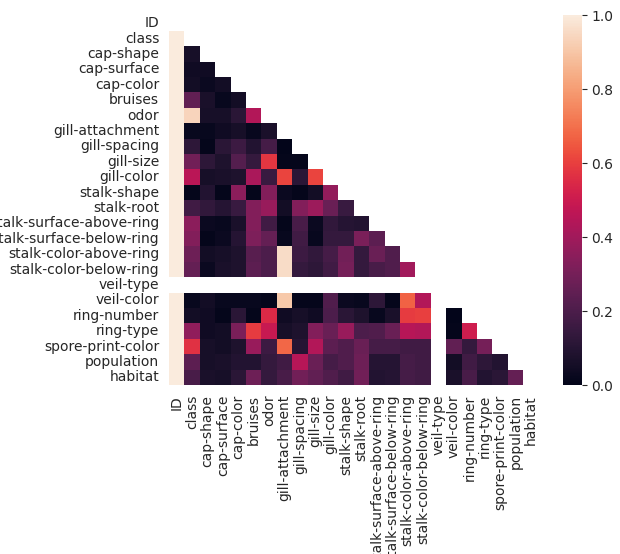

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()